Assuming lengthscale same in all directions

In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mvnorm


In [2]:
def findbound(X,w,ls,d,gridspacing,gridsize):
    """
    The gaussians here are normalised, please take this into account when chosing w.
    """
    mg = np.meshgrid(*([np.arange(0,gridsize,gridspacing)]*d))
    mesh = []
    for mgitem in mg:
        mesh.append(mgitem.flatten())
    mesh = np.array(mesh).T
    tot = np.zeros(len(mesh))
    C = np.eye(d)*(ls**2)
    for x in X:
        norm = mvnorm(x,C)
        tot += norm.pdf(mesh)
    maxgridpoint = np.max(tot)
    #compute possible additional height between grid points
    p = np.sqrt(d)*gridspacing/2 
    
    tempdist = mvnorm(np.zeros(d),C)
    centre = np.zeros(d)
    perturbed = centre.copy()
    perturbed[0]+=p
    potential_shortfall = (tempdist.pdf(centre)-tempdist.pdf(perturbed))*np.sum(np.abs(w))
    return maxgridpoint+potential_shortfall

In [46]:
d = 2
n = 30
X = np.random.rand(n,d)*10
w = np.random.rand(n) #scale of each

In [ ]:
#gridcount = 10
gridsize = 10
#gridspacing=gridsize/(gridcount**(1.0/d))
results = []
for gridspacing in [0.025,0.05,0.1,0.2,0.4,0.8,1.6,3.2]:
    b = findbound(X,w,ls=2,d=d,gridspacing=gridspacing,gridsize=gridsize)
    results.append((gridspacing,b))

Text(0,0.5,'Upper Bound on maximum')

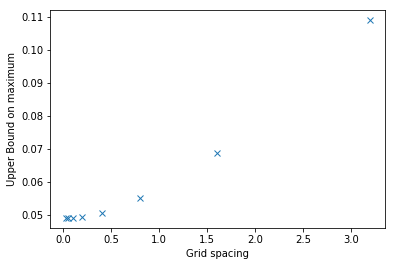

In [57]:
results = np.array(results)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results[:,0],results[:,1],'x')
plt.xlabel('Grid spacing')
plt.ylabel('Upper Bound on maximum')

### Finding a bound on a mixture of Gaussians

If we have n Gaussians, each scaled by a weight $w_i$. We assume for now that each dimension has equal variance and there is no covariance (i.e. the covariance matrix, $C$, is a diagonal, on which all the values are $l^2$, where $l$ is the lengthscale.

We approach this by considering checking a grid of locations within which we know a priori that the maximum must lie (or possibly we're only interested in maxima within the grid). If we consider a single location $x$ on the grid, near the global maximum $x_*$. How much larger than $f(x)$ can $f(x_*)$ be?

We can find a simple bound for this, by considering the case in which all the data points (in which $w>0$) lie at the same location. So an upper bound for the peak is,

$S = \sum_{i=1}^n (w_i)$

where we assume the maximum of the Gaussians are $w_i$.

Therefore, if we test a point within distance $d$ from the peak (evalutating the Gaussian $G(d|0,C)$) we will have a result that is within 

$S \left[1 - G(d|0,C)\right]$ 

of the peak.

So if we test a grid, in which each grid point is within $2d$ of another grid point, we can say that the maximum is no greater than the greatest grid point plus the above difference.

For a $d$ dimensional grid, the largest distance between a square grid spaced $g$ apart is $g\sqrt{d}$. For example a 3d grid, spaced 2 apart has a diagonal distance of 3.464. Thus the largest distance ($p$) we should consider is half that; 1.732.